Index(['ID', 'Is_Product_Details_viewed', 'Session_Activity_Count',
       'No_Items_Added_InCart', 'No_Items_Removed_FromCart', 'No_Cart_Viewed',
       'Purchase_Confirmed', 'Purchase_Initiated ', 'No_Cart_Items_Viewed',
       'No_Customer_Login', 'No_Page_Viewed', 'Customer_Segment_Type',
       'Cart_Abandoned', 'Added_items', 'Confirmed_Added_Items',
       'Confirmed_iniated'],
      dtype='object')
             ID Is_Product_Details_viewed  Session_Activity_Count  \
0  Session_ID_0                       Yes                       4   
1  Session_ID_1                        No                      38   
2  Session_ID_2                        No                       8   
3  Session_ID_3                        No                       6   
4  Session_ID_4                       Yes                      31   

   No_Items_Added_InCart  No_Items_Removed_FromCart  No_Cart_Viewed  \
0                    1.0                          0             0.0   
1                    0.0         

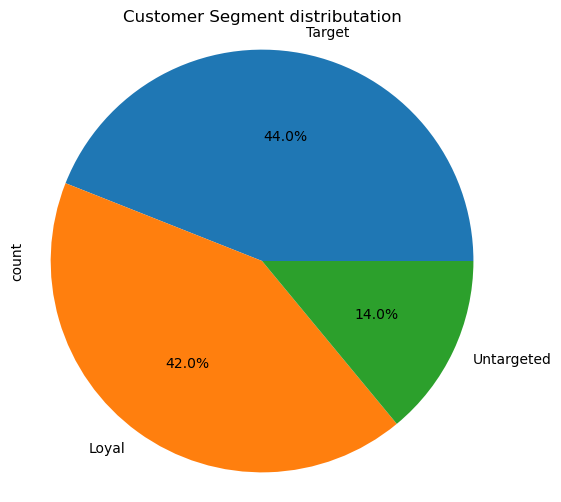

Purchased: 16
Abandoned: 62
Untarget: 20


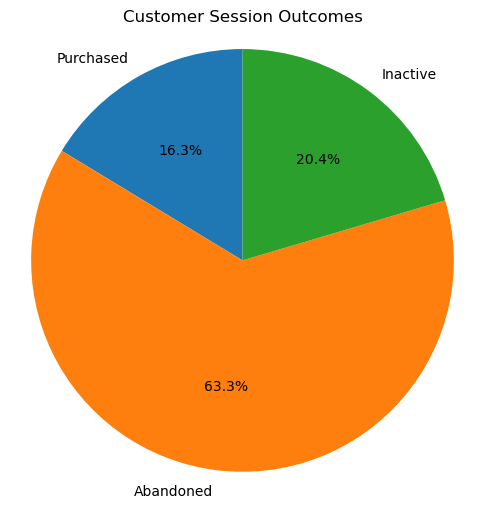

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Analysis.xlsx')

#print header row
print(df.columns)
# Print the first 5 rows of data to understand its structure.
print(df.head(5))
# Use the type() function to view the variable (column) types in the
print(df.dtypes)

# Write a basic loop to filter rows based on a specific condition
# loop through each row
for index, row in df.iterrows():
    # go through rows for cart/checkout
    added_to_cart = row['Confirmed_Added_Items']
    confirmed_purchase = row['Purchase_Confirmed']

    # use a if statement to check if that cart was abondened or not
    #if people added an item, BUT didn't checkout, print yes, otherwise no 
    if added_to_cart > 0 and confirmed_purchase == 0: 
        print(f"Row " + str(index) + ": Cart Abandoned → Yes")
    else:
        print(f"Row " + str(index) + ": Cart Abandoned → No")

# create a for loop to show which shows which type of cusotmers aboonded their carts, and which didnt. 
for index, row in df.iterrows():
    segment = row ['Customer_Segment_Type']
    added = row['No_Items_Added_InCart']
    confirmed = row['Purchase_Confirmed']
 
    # if they added to cart and purchased, print "Purchased: #"
    # if they added to cart, but abondened it, print "Abondened: "
    # if they didnt add anything to cart, and didnt cehckout: "Untargeted"
    if added > 0 and confirmed > 0:
        print("Row " + str(index) + " | Segment: " + str(segment) + " → Purchased")
    elif added > 0 and confirmed == 0:
        print("Row " + str(index) + " | Segment: " + str(segment) + " → Abondened cart")
    elif added == 0 and confirmed == 0:
        print("Row " + str(index) + " | Segment: " + str(segment) + " → Inactive/Untargeted")

# PIE CHART 
# Count how many customers fall into each segment 'Customer_Segment_Type' 
# where 0 = Target, 1 = Loyal, 2 = Untargeted
counts = df["Customer_Segment_Type"].value_counts()
'''
# print(counts)
Customer_Segment_Type
1    44
0    42
2    14
'''
#Labels
counts.index = ['Target', 'Loyal', 'Untargeted']
#create the pie chart
counts.plot(kind='pie',
            autopct='%1.1f%%',
            figsize=(6,6))
plt.title("Customer Segment distributation")
# Makes the pie chart a circle
plt.axis('equal')
plt.show()


# another pie chart for the second loop
# the percentage of each category : the segment types that purchased, abandoned the cart, and untargeted
# Set up counters for each category
purchased = 0
inactive = 0
abandoned = 0

for index, row in df.iterrows():
    added = row['Confirmed_Added_Items']
    confirmed = row['Purchase_Confirmed']

    if confirmed > 0 and added > 0:
        purchased += 1
    elif confirmed == 0 and added > 0:
        abandoned += 1
    elif confirmed == 0 and added == 0:
        inactive += 1

print("Purchased:", purchased)
print("Abandoned:", abandoned)
print("Untarget:", inactive )

values = [purchased, abandoned, inactive]
labels = ['Purchased', 'Abandoned', 'Inactive']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Customer Session Outcomes")
plt.axis('equal')  
plt.show()